In [349]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [350]:
df = pd.read_csv("./datasets/Salary_dataset.csv")
df = df.drop("Unnamed: 0", axis=1)
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [351]:
X = np.expand_dims(np.array(df['YearsExperience'].to_list()), 1)
Y = np.expand_dims(np.array(df['Salary'].to_list()), 1)
print(X)
print(Y)

[[ 1.2]
 [ 1.4]
 [ 1.6]
 [ 2.1]
 [ 2.3]
 [ 3. ]
 [ 3.1]
 [ 3.3]
 [ 3.3]
 [ 3.8]
 [ 4. ]
 [ 4.1]
 [ 4.1]
 [ 4.2]
 [ 4.6]
 [ 5. ]
 [ 5.2]
 [ 5.4]
 [ 6. ]
 [ 6.1]
 [ 6.9]
 [ 7.2]
 [ 8. ]
 [ 8.3]
 [ 8.8]
 [ 9.1]
 [ 9.6]
 [ 9.7]
 [10.4]
 [10.6]]
[[ 39344.]
 [ 46206.]
 [ 37732.]
 [ 43526.]
 [ 39892.]
 [ 56643.]
 [ 60151.]
 [ 54446.]
 [ 64446.]
 [ 57190.]
 [ 63219.]
 [ 55795.]
 [ 56958.]
 [ 57082.]
 [ 61112.]
 [ 67939.]
 [ 66030.]
 [ 83089.]
 [ 81364.]
 [ 93941.]
 [ 91739.]
 [ 98274.]
 [101303.]
 [113813.]
 [109432.]
 [105583.]
 [116970.]
 [112636.]
 [122392.]
 [121873.]]


In [352]:
split = int(0.8 * len(X))
X_train, Y_train = X[:split], Y[:split]
X_test, Y_test = X[split:], Y[split:]

print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

[[1.2]
 [1.4]
 [1.6]
 [2.1]
 [2.3]
 [3. ]
 [3.1]
 [3.3]
 [3.3]
 [3.8]
 [4. ]
 [4.1]
 [4.1]
 [4.2]
 [4.6]
 [5. ]
 [5.2]
 [5.4]
 [6. ]
 [6.1]
 [6.9]
 [7.2]
 [8. ]
 [8.3]]
[[ 39344.]
 [ 46206.]
 [ 37732.]
 [ 43526.]
 [ 39892.]
 [ 56643.]
 [ 60151.]
 [ 54446.]
 [ 64446.]
 [ 57190.]
 [ 63219.]
 [ 55795.]
 [ 56958.]
 [ 57082.]
 [ 61112.]
 [ 67939.]
 [ 66030.]
 [ 83089.]
 [ 81364.]
 [ 93941.]
 [ 91739.]
 [ 98274.]
 [101303.]
 [113813.]]
[[ 8.8]
 [ 9.1]
 [ 9.6]
 [ 9.7]
 [10.4]
 [10.6]]
[[109432.]
 [105583.]
 [116970.]
 [112636.]
 [122392.]
 [121873.]]


In [353]:
class LinRegModel():
    def __init__(self, in_features=1, out_features=1, dtype=np.float64):
        self.weights = np.random.randn(in_features, out_features).astype(dtype=dtype)
        self.bias = np.random.randn()
    
    def forward(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def optimizer_step(self, gradients, lr=0.1, debug=False):
        weight_grads = gradients["weights"]
        bias_grad = gradients["bias"]

        new_weights = self.weights - (lr * weight_grads)
        new_bias = self.bias - (lr * bias_grad)

        if debug:
            print(f'Weights: {self.weights} --> {new_weights}')
            print(f'Bias: {self.bias} --> {new_bias}')

        self.weights = new_weights
        self.bias = new_bias
    
    def state_dict(self):
        return {"weights": self.weights, "bias": self.bias}

In [354]:
np.random.seed(seed=42)

linear = LinRegModel(in_features=1, out_features=1)
print(linear.state_dict())

{'weights': array([[0.49671415]]), 'bias': -0.13826430117118466}


In [355]:
print(X_test, X_test.shape)
y_preds = linear.forward(X_test) #(N, in_features) x (in_features, out_features) = (N, out_features)

print(y_preds) 
print(y_preds.shape) # (N, out_features)


[[ 8.8]
 [ 9.1]
 [ 9.6]
 [ 9.7]
 [10.4]
 [10.6]] (6, 1)
[[4.23282025]
 [4.38183449]
 [4.63019157]
 [4.67986298]
 [5.02756289]
 [5.12690572]]
(6, 1)


In [356]:
def plot_predictions(X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test, predictions=None):
    plt.scatter(X_train, Y_train, c='green', label='train')
    plt.scatter(X_test, Y_test, c='blue', label='test')

    if predictions is not None:
        plt.scatter(X_test, predictions, c='red', label='predictions')
    
    plt.legend()

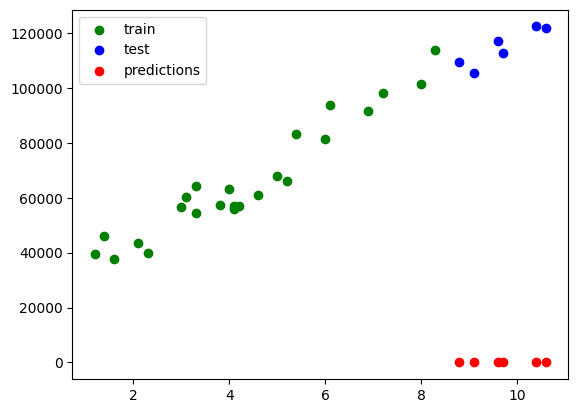

In [357]:
plot_predictions(predictions=y_preds)

In [358]:
#loss_function

def MSELoss(Y: np.ndarray, Yhat: np.ndarray) -> np.float64:
    return np.mean((Y - Yhat) ** 2)


In [359]:
'''
X: [n x in_features] matrix to represent n examples that are being trained on
Y: [n x out_features] matrix -- ground truth, using this to calculate loss, usually [n x 1]
In lin regression, out_features = 1



# Yhat = w1x1 + w2x2 + w3x3 + bias
'''


def compute_gradients(Y, X, model=linear, debug=False):

    Yhat = model.forward(X)

    loss = MSELoss(Y=Y, Yhat=Yhat)

    #dloss_dw = -2 * np.dot(X.T, (Y-Yhat))  #gradient matrix for weights, calculates gradients for each w in W for each example in batch 'X'
    # num cols of dloss_dw and X == in_features, # of gradients for X
    

    avg_weight_grad = -2 * np.dot(X.T, (Y-Yhat)) / Y.size # take average gradient across batch X
    
    dloss_db = -2 * (Y-Yhat) #gradient matrix for bias, calculate gradient of b for each example in batch 'X'
    avg_bias_grad = np.mean(dloss_db)

    if debug:
        print(f'X: {X}')
        print(f'-2 * y-yhat: {-2 * Y-Yhat}')
        print(f'dloss_dw: {avg_weight_grad}')
        print(f'loss: {loss}')
        print(f'weight batch gradient: {avg_weight_grad}')
        print(f'bias batch gradient: {avg_bias_grad}')


    
    # print(dloss_db, dloss_db.shape)

    gradients = {"weights": avg_weight_grad, "bias": avg_bias_grad}
    return gradients
    


In [360]:
learning_rate = 0.01
EPOCHS = 1005
epochs = []
loss_values = []

#TRAINING LOOP
for epoch in range(EPOCHS):
    
    y_preds = linear.forward(X=X_train)
    loss = MSELoss(Y=Y_train, Yhat=y_preds)
    gradients = compute_gradients(Y=Y_train, X=X_train, model=linear)
    linear.optimizer_step(gradients, lr=learning_rate)

    epochs.append(epoch)
    loss_values.append(loss)

    print(f'EPOCH: {epoch}, LOSS: {loss}')





EPOCH: 0, LOSS: 4823377175.876935
EPOCH: 1, LOSS: 1421684434.362055
EPOCH: 2, LOSS: 470939967.7922124
EPOCH: 3, LOSS: 204985815.76057562
EPOCH: 4, LOSS: 130362291.33542173
EPOCH: 5, LOSS: 109198102.3544261
EPOCH: 6, LOSS: 102972375.53547455
EPOCH: 7, LOSS: 100922471.27324672
EPOCH: 8, LOSS: 100041324.14066298
EPOCH: 9, LOSS: 99488754.87903196
EPOCH: 10, LOSS: 99030006.34962435
EPOCH: 11, LOSS: 98599474.77567922
EPOCH: 12, LOSS: 98178817.45161287
EPOCH: 13, LOSS: 97762896.37188809
EPOCH: 14, LOSS: 97350262.97408462
EPOCH: 15, LOSS: 96940499.60173391
EPOCH: 16, LOSS: 96533476.71578892
EPOCH: 17, LOSS: 96129145.3609922
EPOCH: 18, LOSS: 95727479.18099387
EPOCH: 19, LOSS: 95328458.216982
EPOCH: 20, LOSS: 94932064.38051496
EPOCH: 21, LOSS: 94538280.18809743
EPOCH: 22, LOSS: 94147088.40708227
EPOCH: 23, LOSS: 93758471.95619756
EPOCH: 24, LOSS: 93372413.87721924
EPOCH: 25, LOSS: 92988897.3265246
EPOCH: 26, LOSS: 92607905.57220443
EPOCH: 27, LOSS: 92229421.99273162
EPOCH: 28, LOSS: 91853430.076

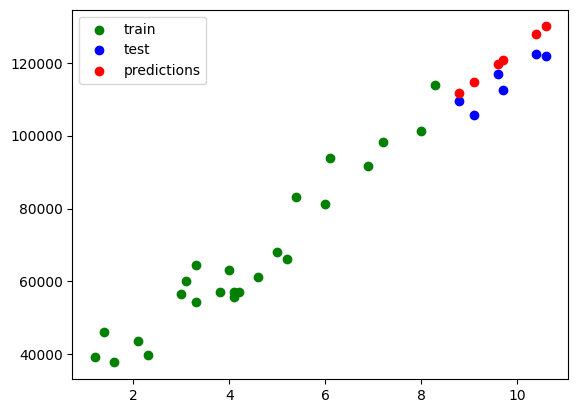

In [361]:
y_preds = linear.forward(X_test)
plot_predictions(predictions=y_preds)

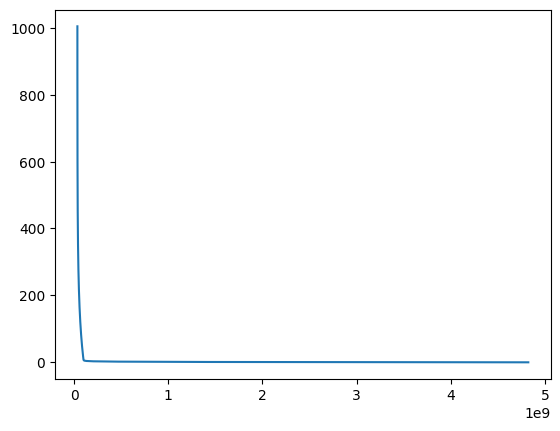

In [362]:
plt.plot(loss_values, epochs)
plt.show()

In [363]:
w1 = 4
w2 = 0.3
W = np.array([[4], [0.3]])
print(W)
bias = 9

col1 = np.expand_dims(np.arange(1, 11), 1) #col 1
col2 = np.expand_dims(np.arange(8, 13, step=0.5), 1)
# print(col2)
X2 = np.append(col1, col2, axis=1)
X2, X2.shape

Y2 = np.dot(X2, W) + bias
Y2


[[4. ]
 [0.3]]


array([[15.4 ],
       [19.55],
       [23.7 ],
       [27.85],
       [32.  ],
       [36.15],
       [40.3 ],
       [44.45],
       [48.6 ],
       [52.75]])

In [364]:
split = int(len(X2) * 0.8)
X2_train, Y2_train = X2[:split], Y2[:split]
X2_test, Y2_test = X2[split:], Y2[split:]
X2_train, Y2_train, X2_test, Y2_test

(array([[ 1. ,  8. ],
        [ 2. ,  8.5],
        [ 3. ,  9. ],
        [ 4. ,  9.5],
        [ 5. , 10. ],
        [ 6. , 10.5],
        [ 7. , 11. ],
        [ 8. , 11.5]]),
 array([[15.4 ],
        [19.55],
        [23.7 ],
        [27.85],
        [32.  ],
        [36.15],
        [40.3 ],
        [44.45]]),
 array([[ 9. , 12. ],
        [10. , 12.5]]),
 array([[48.6 ],
        [52.75]]))

In [365]:
np.random.seed(seed=42)

linear2 = LinRegModel(in_features=2, out_features=1)
weights = linear2.state_dict()['weights']
bias = linear2.state_dict()['bias']
print(weights, weights.shape)
print(bias)

[[ 0.49671415]
 [-0.1382643 ]] (2, 1)
0.6476885381006925


In [366]:
yhat2 = linear2.forward(X2_train)
loss = MSELoss(Y=Y2_train, Yhat=yhat2)
yhat2, Y2_test, loss

(array([[0.03828828],
        [0.46587028],
        [0.89345229],
        [1.32103429],
        [1.74861629],
        [2.17619829],
        [2.6037803 ],
        [3.0313623 ]]),
 array([[48.6 ],
        [52.75]]),
 np.float64(878.7480977316336))

In [367]:
gradients = compute_gradients(Y=Y2_train, X=X2_train, model=linear2, debug=True)
gradients

X: [[ 1.   8. ]
 [ 2.   8.5]
 [ 3.   9. ]
 [ 4.   9.5]
 [ 5.  10. ]
 [ 6.  10.5]
 [ 7.  11. ]
 [ 8.  11.5]]
-2 * y-yhat: [[-30.83828828]
 [-39.56587028]
 [-48.29345229]
 [-57.02103429]
 [-65.74861629]
 [-74.47619829]
 [-83.2037803 ]
 [-91.9313623 ]]
dloss_dw: [[-294.59696136]
 [-573.15110133]]
loss: 878.7480977316336
weight batch gradient: [[-294.59696136]
 [-573.15110133]]
bias batch gradient: -56.78034941953562


{'weights': array([[-294.59696136],
        [-573.15110133]]),
 'bias': np.float64(-56.78034941953562)}

In [368]:
X2, X2[[0, 1, 3], :]
len(X2[0])

2

In [435]:
#train loop
lr = 0.0001
EPOCHS = 10000

for epoch in range(EPOCHS):
    y_preds = linear2.forward(X2_train)
    loss = MSELoss(Y=Y2_train, Yhat=y_preds)
    gradients = compute_gradients(Y=Y2_train, X=X2_train, model=linear2)
    linear2.optimizer_step(gradients=gradients, lr=lr)

    print(f'EPOCH: {epoch} Loss: {loss}')


EPOCH: 0 Loss: 9.960107436395655e-07
EPOCH: 1 Loss: 9.950118146281201e-07
EPOCH: 2 Loss: 9.940138874658052e-07
EPOCH: 3 Loss: 9.93016961160977e-07
EPOCH: 4 Loss: 9.920210347049214e-07
EPOCH: 5 Loss: 9.910261070910557e-07
EPOCH: 6 Loss: 9.900321773161123e-07
EPOCH: 7 Loss: 9.890392443852948e-07
EPOCH: 8 Loss: 9.880473072981093e-07
EPOCH: 9 Loss: 9.870563650553564e-07
EPOCH: 10 Loss: 9.860664166578699e-07
EPOCH: 11 Loss: 9.850774611054704e-07
EPOCH: 12 Loss: 9.840894974113867e-07
EPOCH: 13 Loss: 9.831025245712255e-07
EPOCH: 14 Loss: 9.821165415983933e-07
EPOCH: 15 Loss: 9.811315474982809e-07
EPOCH: 16 Loss: 9.8014754127657e-07
EPOCH: 17 Loss: 9.791645219494477e-07
EPOCH: 18 Loss: 9.781824885114086e-07
EPOCH: 19 Loss: 9.77201439989688e-07
EPOCH: 20 Loss: 9.762213753902414e-07
EPOCH: 21 Loss: 9.752422937282639e-07
EPOCH: 22 Loss: 9.742641940197529e-07
EPOCH: 23 Loss: 9.732870752712952e-07
EPOCH: 24 Loss: 9.723109365081264e-07
EPOCH: 25 Loss: 9.713357767386908e-07
EPOCH: 26 Loss: 9.70361594

In [436]:
linear2.state_dict(), W, bias

({'weights': array([[3.44385962],
         [1.4122751 ]]),
  'bias': np.float64(0.6579507601659266)},
 array([[4. ],
        [0.3]]),
 0.6476885381006925)

In [437]:
yhat_test = linear2.forward(X2_test)
yhat_train = linear2.forward(X2_train)
yhat_test, Y2_test, yhat_train, Y2_train

(array([[48.59998847],
        [52.74998563]]),
 array([[48.6 ],
        [52.75]]),
 array([[15.40001115],
        [19.55000831],
        [23.70000548],
        [27.85000264],
        [31.99999981],
        [36.14999697],
        [40.29999414],
        [44.4499913 ]]),
 array([[15.4 ],
        [19.55],
        [23.7 ],
        [27.85],
        [32.  ],
        [36.15],
        [40.3 ],
        [44.45]]))